In [1]:
from google.cloud import speech
from google.cloud import storage
from google.protobuf.json_format import MessageToDict
import io
from google.oauth2 import service_account
import time
import pandas as pd

In [2]:
def transcribe_medical_wav(wav_file_path):
    """
    Transcribe a medical WAV file using Google Speech-to-Text API.

    Args:
        wav_file_path (str): The path to the WAV file to be transcribed.

    Returns:
        list: A list of tuples containing the transcript and confidence score.
    """
    client = speech.SpeechClient()

    # Load the audio file
    with io.open(wav_file_path, "rb") as audio_file:
        content = audio_file.read()

    audio = speech.RecognitionAudio(content=content)

    # Specify that the audio data is medical audio
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=44100,  # Sample rate of your WAV file
        language_code="en-US",  # Language code
        audio_channel_count=1,
        enable_separate_recognition_per_channel=False,
        use_enhanced=True,
        model="medical_conversation",  # Use the medical model
        enable_automatic_punctuation=True,
        diarization_config=None
    )

    # Perform the transcription
    response = client.recognize(config=config, audio=audio)

    # Output the transcripts
    transcripts = []
    for result in response.results:
        transcript = result.alternatives[0].transcript
        confidence = result.alternatives[0].confidence
        transcripts.append((transcript, confidence))

    return transcripts

In [3]:
wav_with_beeps = 'beeps/'

In [4]:
wav_without_beeps = 'no_beeps/'

In [5]:
import os

def list_all_wav_files_in_directory(directory_path):
    """
    Transcribe all WAV files in a directory using Google Speech-to-Text API.

    Args:
        directory_path (str): The path to the directory containing WAV files.

    Returns:
        list: A list of transcripts
    """
    # List all files in the directory
    files = os.listdir(directory_path)
    
    # Filter out only WAV files
    wav_files = [directory_path+file for file in files if file.endswith(".wav")]

    return wav_files

In [6]:
list_all_wav_files_in_directory(wav_with_beeps)

['beeps/Clement 2_EB.wav',
 'beeps/Kat 2_EB.wav',
 'beeps/Sally 5_EB.wav',
 'beeps/01-B_EB.wav',
 'beeps/Mar 3_EB.wav',
 'beeps/Maya 2_EB.wav',
 'beeps/01-D_EB.wav',
 'beeps/Sally 3_EB.wav',
 'beeps/Clement 4_EB.wav',
 'beeps/Kat 4_EB.wav',
 'beeps/Sally 1_EB.wav',
 'beeps/Maya 4_EB.wav',
 'beeps/Mar 5_EB.wav',
 'beeps/01-C_EB.wav',
 'beeps/Sally 4_EB.wav',
 'beeps/Clement 3_EB.wav',
 'beeps/Kat 3_EB.wav',
 'beeps/Maya 3_EB.wav',
 'beeps/Kat 1_EB.wav',
 'beeps/Clement 1_EB.wav',
 'beeps/01-A_EB.wav',
 'beeps/Mar1_EB.wav',
 'beeps/Mar 2_EB.wav',
 'beeps/Clement 5_EB.wav',
 'beeps/Kat 5_EB.wav',
 'beeps/Maya1_EB.wav',
 'beeps/Sally 2_EB.wav',
 'beeps/01-E_EB.wav',
 'beeps/Mar 4_EB.wav',
 'beeps/Maya 5_EB.wav']

In [7]:
test_file = 'no_beeps/test_short_clement_1.wav'

In [8]:
from google.cloud import speech


def speech_to_text(
    config: speech.RecognitionConfig,
    audio: speech.RecognitionAudio,
) -> speech.RecognizeResponse:
    client = speech.SpeechClient()

    # Synchronous speech recognition request
    response = client.recognize(config=config, audio=audio)

    return response


def print_response(response: speech.RecognizeResponse):
    for result in response.results:
        print_result(result)


def print_result(result: speech.SpeechRecognitionResult):
    best_alternative = result.alternatives[0]
    print("-" * 80)
    print(f"language_code: {result.language_code}")
    print(f"transcript:    {best_alternative.transcript}")
    print(f"confidence:    {best_alternative.confidence:.0%}")

In [9]:
import os
from pydub import AudioSegment

def split_audio(input_file, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Load the input audio file
    audio = AudioSegment.from_file(input_file)
    
    # Calculate the number of segments needed
    segment_length_ms = 45 * 1000  # 45 seconds in milliseconds
    num_segments = len(audio) // segment_length_ms + (1 if len(audio) % segment_length_ms != 0 else 0)
    
    # Split the audio into segments and save each segment
    for i in range(num_segments):
        start_time = i * segment_length_ms
        end_time = min((i + 1) * segment_length_ms, len(audio))
        segment = audio[start_time:end_time]
        output_file = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(input_file))[0]}_part{i+1}.wav")
        segment.export(output_file, format="wav")

In [10]:
speech.RecognitionConfig

google.cloud.speech_v1.types.cloud_speech.RecognitionConfig

In [11]:
config = speech.RecognitionConfig(model="medical_conversation")

In [13]:
import json 
# Load the JSON file
with open('config.json', 'r') as file:
    config = json.load(file)
# Access the required fields
service_account_id = config.get('service_account_id')
project_id = config.get('project_id')

In [15]:
client_file = 'sa_speech_demo.json'
credentials = service_account.Credentials.from_service_account_file(client_file)
client = speech.SpeechClient(credentials=credentials)

In [16]:
audio_file = test_file
with io.open(audio_file, 'rb') as f:
    content = f.read()
    audio = speech.RecognitionAudio(content=content)

In [17]:
medical_config = speech.RecognitionConfig(
    encoding = speech.RecognitionConfig.AudioEncoding.LINEAR16,
    #sample_rate_hertz=44100,
    language_code="en-US",
    model="medical_conversation"
)

In [18]:
medical_dictation_config = speech.RecognitionConfig(
    encoding = speech.RecognitionConfig.AudioEncoding.MULAW,
    sample_rate_hertz=44100,
    language_code="en-US",
    model="medical_dictation"
)

In [19]:
default_config = speech.RecognitionConfig(
    encoding = speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=44100,
    language_code="en-US",
)

In [20]:
def transcript_file(file, config):
    with io.open(file, 'rb') as f:
        content = f.read()
        file_audio = speech.RecognitionAudio(content=content)
    s2t_response = client.recognize(config=config, audio=file_audio)
    content = ""
    for result in s2t_response.results:
        content += result.alternatives[0].transcript
    return [content, file.replace(".wav", "")]

In [36]:
response = client.recognize(config=medical_config, audio=audio)

In [44]:
default_response = client.recognize(config=default_config, audio=audio)

In [45]:
dictation_response = client.recognize(config=medical_dictation_config, audio=audio)

In [33]:
for result in response.results:
    print(result.alternatives[0].transcript)

Hello . Unclimited . I'm a nurse who's taking care of you today . How are you doing ?  Oh
 .  Oh , uh , what do you mean by that ?  My stomach really hurts .  Well , your stomach hurts . Um , how long has it been hurting ? 
 And what does it feel like ?  Uh , it's kind of like a aching , throbbing sensation by my incision from my appendectomy .  Oh , I see . Okay . Um , and how bad is the pain out of 10 ?  Right now , it's probably a five out of 10 pain



In [39]:
for result in default_response.results:
    print(result.alternatives[0].transcript)

hello I'm Clements I'm a nurse who's taking care of you today how are you doing
 oh what do you mean by that
 really hurt your stomach hurts how long has it been hurting
 and what does it feel like
 it's kind of like a aching throbbing sensation by my incision for my appendectomy and how bad is the pain out of 10
 right now it's probably a 5 out of 10 pain


In [46]:
for result in dictation_response.results:
    print(result.alternatives[0].transcript)

Hello , I am comment on a nurse who is taking care of you today . How are you doing
 oh um what do you mean by that um your stomach hurts uhm how long has it been hurting
 and what does it feel like . Okay . Um and help out as the pain out of 10 .



In [68]:
longer = 'no_beeps/Sally 1_short.wav'

In [69]:
audio_file = longer
with io.open(audio_file, 'rb') as f:
    content = f.read()
    audio = speech.RecognitionAudio(content=content)

In [70]:
medical_response = client.recognize(config=medical_config, audio=audio)

In [71]:
for result in medical_response.results:
    print(result.alternatives[0].transcript)

And how are you feeling this morning ? Any pain ?  Uh , yeah , a little bit .  Where is the pain ?  Uh , to the incision site
  Here on the abdomen here ?  Yeah . I'm not side , um , where I had surgery .  Oh , okay . So , on the right side , there's some pain . And how would you rate the pain right now from 0-10 ?  It's , like , a 2 out of 10.  A 2 out of 10 , okay .  Or 4 when I moved .  How much does it increase in pain when you're getting up and walking around ?  It probably goes to a 4 , but  Four out of 10 ? And is this manageable for you , four out of ten pain ?  Uh , not , can you give me anything ?
 Um , I can give you pain medication . However


In [74]:
!pip install pydub

DEPRECATION: bert-score 0.3.11 has a non-standard dependency specifier transformers>=3.0.0numpy. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of bert-score or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [94]:
# no beeps
for input_file in list_all_wav_files_in_directory(wav_without_beeps):
    output_dir = 'split_sounds/no_beeps'
    split_audio(input_file, output_dir)

In [95]:
# beeps
for input_file in list_all_wav_files_in_directory(wav_with_beeps):
    output_dir = 'split_sounds/beeps'
    split_audio(input_file, output_dir)

In [24]:
files_to_parse = len(list_all_wav_files_in_directory('split_sounds/no_beeps'))

In [25]:
for i in range(10):
    print(f"Progress: {i}/10", end='\r')
    time.sleep(1)

In [20]:
transcript_file('split_sounds/no_beeps/Clement 3_part3.wav', medical_config)

["It looks like it's come up a bit to 93 on 6 liters of the face mask .  .  Um , are you , so , uh , let me set you up and see if that makes you feel better . How is that ?  Yeah , I think sitting up made me feel a lot better .  Okay . Um , and  .  And do you have heart failure Um , no .  No ? Okay . Um , okay . Well , I think that we need to call a doctor and maybe get you a chest x-ray , and potentially some medications or maybe another ECG , um  Uh , are you",
 'split_sounds/no_beeps/Clement 3_part3']

In [28]:
%%time
transcriptions = []
for idx, wav_file in enumerate(list_all_wav_files_in_directory('split_sounds/no_beeps/')):
    print(f"{idx}/{files_to_parse}", end='\r')
    try:
        transcriptions.append(transcript_file(wav_file, medical_config))
    except:
        transcriptions.append(["parse failure", wav_file])
        
    

CPU times: user 4.1 s, sys: 5.87 s, total: 9.98 s
Wall time: 35min 45s


In [96]:
len(transcriptions)

173

In [100]:
medical_transcriptions = pd.DataFrame(transcriptions, columns=['transcription', 'name']).sort_values(by='name')
medical_transcriptions

,transcription,name
50,"Good . Pretend to where that , because I usual...",split_sounds/no_beeps/01-A (1)_part1
62,It's an 8 out of 10. Have you had any pain med...,split_sounds/no_beeps/01-A (1)_part2
58,Updating the stomach ? Hum-um . Any pain ? ...,split_sounds/no_beeps/01-A (1)_part3
82,"We'll stop day one right now . Sure . Uh , ha...",split_sounds/no_beeps/01-A (1)_part4
78,. Um-hum . Have you been able to drink water ...,split_sounds/no_beeps/01-A (1)_part5
...,...,...
28,parse failure,split_sounds/no_beeps/compressed_Clement 1_par...
22,parse failure,split_sounds/no_beeps/compressed_Clement 1_par...
139,parse failure,split_sounds/no_beeps/compressed_Clement 1_par...
142,parse failure,split_sounds/no_beeps/compressed_Clement 1_par...


In [101]:
def combine_transcriptions(df):
    # Extract the `{name}` part from the 'name' column
    df['name_part'] = df['name'].str.extract(r'(.*)_part\d+')

    # Group by the `{name}` part and combine transcriptions
    combined_df = df.groupby('name_part')['transcription'].apply(lambda x: ' '.join(x)).reset_index()

    # Remove the temporary 'name_part' column
    combined_df.drop(columns=['name_part'], inplace=True)

    return combined_df

In [102]:
# transcriptions

In [103]:
combine_transcriptions(medical_transcriptions)

,transcription
0,"Good . Pretend to where that , because I usual..."
1,Oh . Hi . How are you feeling right now ? Oh...
2,"So it's kind of Hi , sorry . . How are you f..."
3,Okay . The butt cracks the wrong way . Damn sh...
4,Oh . Oh . Hi . How are you feeling right now...
5,Hello . Unclimited . I'm a nurse who's taking ...
6,"Oh . Hello . How are you doing ? Chest , oh ..."
7,"Hi . Uh , I heard you , you called the combo ?..."
8,"Hi . Hi . What's going on ? Well , I just p..."
9,"Hi . I'm climbing . I'm your nurse . Uh , let ..."


In [104]:
import pandas as pd

def combine_transcriptions(df):
    # Extract the `{name}` part from the 'name' column
    df['name_part'] = df['name'].str.split('_part').str[0]

    # Group by the `{name}` part and combine transcriptions
    combined_df = df.groupby('name_part')['transcription'].apply(lambda x: ' '.join(x)).reset_index()

    # Remove the temporary 'name_part' column
    df.drop(columns=['name_part'], inplace=True)

    return combined_df

# Example usage:
# Create a sample DataFrame
data = {
    'transcription': ['transcription1', 'transcription2', 'transcription3'],
    'name': ['John_part1', 'John_part2', 'Alice_part1']
}
df = pd.DataFrame(data)

# Call the function to combine transcriptions
combined_df = combine_transcriptions(df)

# Remove the "_part\d" suffix from the 'name_part' column
combined_df['name_part'] = combined_df['name_part'].str.split('_').str[0]

In [105]:
combined_df

,name_part,transcription
0,Alice,transcription3
1,John,transcription1 transcription2


In [107]:
final_transcripts = combine_transcriptions(medical_transcriptions).rename({"name_part": "file_name"}, axis=1).iloc[:-2]
final_transcripts

,file_name,transcription
0,split_sounds/no_beeps/01-A (1),"Good . Pretend to where that , because I usual..."
1,split_sounds/no_beeps/01-B (1),Oh . Hi . How are you feeling right now ? Oh...
2,split_sounds/no_beeps/01-C (1),"So it's kind of Hi , sorry . . How are you f..."
3,split_sounds/no_beeps/01-D (1),Okay . The butt cracks the wrong way . Damn sh...
4,split_sounds/no_beeps/01-E,Oh . Oh . Hi . How are you feeling right now...
5,split_sounds/no_beeps/Clement 1,Hello . Unclimited . I'm a nurse who's taking ...
6,split_sounds/no_beeps/Clement 2,"Oh . Hello . How are you doing ? Chest , oh ..."
7,split_sounds/no_beeps/Clement 3,"Hi . Uh , I heard you , you called the combo ?..."
8,split_sounds/no_beeps/Clement 4,"Hi . Hi . What's going on ? Well , I just p..."
9,split_sounds/no_beeps/Clement 5,"Hi . I'm climbing . I'm your nurse . Uh , let ..."


In [108]:
final_transcripts['file_name'] = final_transcripts['file_name'].apply(lambda x: x.replace("split_sounds/no_beeps/", ""))

In [109]:
final_transcripts.head()

,file_name,transcription
0,01-A (1),"Good . Pretend to where that , because I usual..."
1,01-B (1),Oh . Hi . How are you feeling right now ? Oh...
2,01-C (1),"So it's kind of Hi , sorry . . How are you f..."
3,01-D (1),Okay . The butt cracks the wrong way . Damn sh...
4,01-E,Oh . Oh . Hi . How are you feeling right now...


In [110]:
import os

def list_files_in_dir(directory):
    """
    Lists all the files within the specified directory.

    Args:
    - directory (str): The directory path.

    Returns:
    - file_list (list): List of file names.
    """
    # Initialize an empty list to store file names
    file_list = []

    # Iterate over the files in the directory
    for file in os.listdir(directory):
        # Check if the file is a regular file (i.e., not a directory)
        if os.path.isfile(os.path.join(directory, file)):
            # Add the file name to the list
            file_list.append(directory+'/'+file)
    return file_list

transcript_files = list_files_in_dir('real_transcripts')

In [111]:
transcript_list = []

for f in transcript_files:
    df = pd.read_excel(f)
    concatenated_transcripts = ''.join(df['Transcript'].astype(str))
    transcript_list.append([f.replace("real_transcripts/", "").replace(".xlsx",""), concatenated_transcripts])

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def transcript_similarity(transcript1, transcript2):
    """
    Computes the cosine similarity between two transcripts.

    Args:
    - transcript1 (str): The first transcript.
    - transcript2 (str): The second transcript.

    Returns:
    - similarity (float): The cosine similarity between the two transcripts.
    """
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()

    # Fit and transform transcripts
    vectors = vectorizer.fit_transform([transcript1, transcript2])

    # Compute cosine similarity
    similarity = cosine_similarity(vectors)[0, 1]

    return similarity

In [113]:
import Levenshtein

def transcript_accuracy(original_transcript, transcribed_text):
    """
    Computes the accuracy of a transcribed text compared to the original transcript.

    Args:
    - original_transcript (str): The original transcript.
    - transcribed_text (str): The transcribed text.

    Returns:
    - accuracy (float): The accuracy of the transcribed text compared to the original transcript.
    """
    # Compute Levenshtein distance
    distance = Levenshtein.distance(original_transcript, transcribed_text)

    # Compute accuracy
    accuracy = (len(original_transcript) - distance) / len(original_transcript)

    return accuracy

In [114]:
original = pd.DataFrame(transcript_list, columns=['file_name', 'original_transcript'])

In [115]:
merged_df = pd.merge(final_transcripts, original, on='file_name', how='inner')
merged_df

,file_name,transcription,original_transcript
0,01-B (1),Oh . Hi . How are you feeling right now ? Oh...,"Hi, how are you feeling right now? Oh, I'm hav..."
1,01-C (1),"So it's kind of Hi , sorry . . How are you f...",So it's kind of hi Sally. How are you feeling?...
2,01-D (1),Okay . The butt cracks the wrong way . Damn sh...,"Okay, the butt cracks the wrong way. Damn Sall..."
3,Clement 1,Hello . Unclimited . I'm a nurse who's taking ...,"Hello, I'm Clement. I'm a nurse who's taking c..."
4,Clement 2,"Oh . Hello . How are you doing ? Chest , oh ...","Hello, how are you doing? I got really bad che..."
5,Clement 3,"Hi . Uh , I heard you , you called the combo ?...","Hi, uh, I heard you you called the call Bell. ..."
6,Clement 4,"Hi . Hi . What's going on ? Well , I just p...","Hi. Hi what's going on? Well, I just pooped an..."
7,Clement 5,"Hi . I'm climbing . I'm your nurse . Uh , let ...","Hi, I'm Clement. I'm your nurse. Uh, let me I'..."
8,Kat 1,"Okay . I'm not going to talk . Hi , good morn...","Hi, good morning. Are you Sally? Yep. Hi Sally..."
9,Kat 2,"Oh , my gosh . Not narcotics . Sally , I saw ...",Oh my gosh. Knock knock. Hi Sally. I saw you b...


In [118]:
lev = []
cos = []

for idx in range(len(merged_df)):
    row = merged_df.iloc[idx]
    original = row['original_transcript']
    google_transcript = row['transcription']
    
    lev.append(transcript_accuracy(original, google_transcript))
    cos.append(transcript_similarity(original, google_transcript))

In [120]:
merged_df['transcript_levenshtein_accuracy'] = lev
merged_df['cosine_similarity'] = cos

In [125]:
print(merged_df['transcript_levenshtein_accuracy'].mean(), merged_df['transcript_levenshtein_accuracy'].median())
print(merged_df['cosine_similarity'].mean(), merged_df['cosine_similarity'].median())

0.7468540006642198 0.7513595049496149
0.9753264859904701 0.9782855948734441


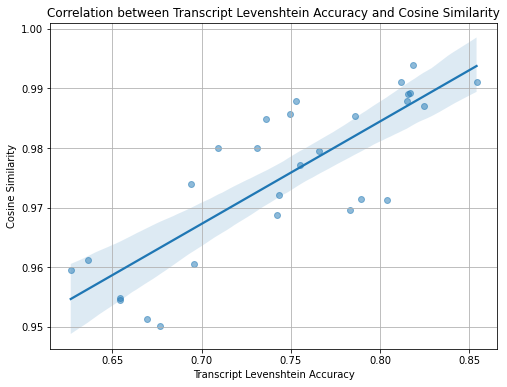

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame containing the columns 'transcript_levenshtein_accuracy' and 'cosine_similarity'

# Create scatter plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='transcript_levenshtein_accuracy', y='cosine_similarity', scatter_kws={'alpha':0.5})
plt.title('Correlation between Transcript Levenshtein Accuracy and Cosine Similarity')
plt.xlabel('Transcript Levenshtein Accuracy')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()


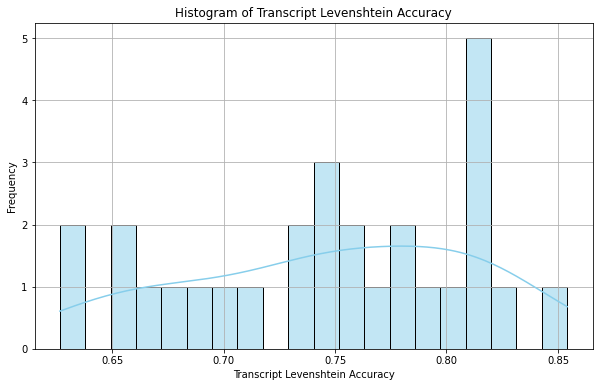

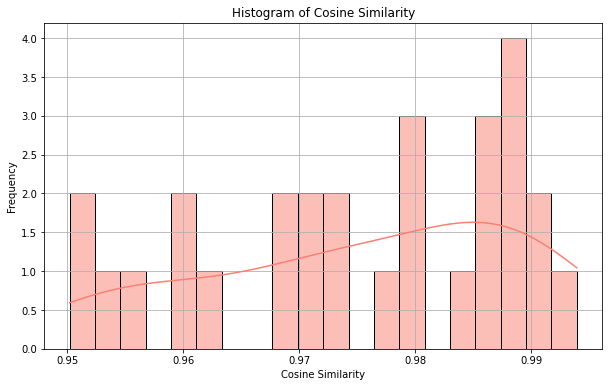

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame containing the columns 'transcript_levenshtein_accuracy' and 'cosine_similarity'

# Create histogram for transcript_levenshtein_accuracy
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='transcript_levenshtein_accuracy', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Transcript Levenshtein Accuracy')
plt.xlabel('Transcript Levenshtein Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create histogram for cosine_similarity
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='cosine_similarity', bins=20, kde=True, color='salmon')
plt.title('Histogram of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
van = 51.73
td = 301
amex = 300